# Notebook intended for new users

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]  # resize figures

sns.set(style='darkgrid')  # style of plot (dark grey background, etc)

# Import classes from correct directory

In [63]:
import sys
sys.path.append("..")
import AdvEMDpy
from emd_hilbert import hilbert_spectrum

# Create example time series

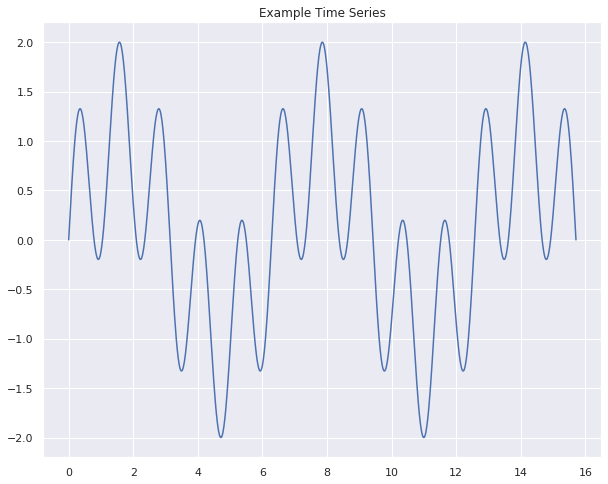

In [64]:
time = np.linspace(0, 5 * np.pi, 1001)
time_series = np.sin(time) + np.sin(5 * time)
plt.plot(time, time_series)
plt.title('Example Time Series')
plt.show()

### Optional keyword arguments (time, knots, knot_time) not included for demonstration

### Decompose time series using Empirical Mode Decomposition

In [65]:
emd = AdvEMDpy.EMD(time_series=time_series)
emd_imfs, emd_hts, emd_ifs, _, _, _, _ = emd.empirical_mode_decomposition()

IMF_11 Standard deviation STOPPING CRITERION NOT MET with sd = 174.15
IMF_12 ALL IMF CONDITIONS MET
IMF_21 Standard deviation STOPPING CRITERION NOT MET with sd = 222902.44
IMF_22 Standard deviation STOPPING CRITERION NOT MET with sd = 19457.25
IMF_23 Standard deviation STOPPING CRITERION NOT MET with sd = 31738.65
IMF_24 Standard deviation STOPPING CRITERION NOT MET with sd = 848.38
IMF_25 Standard deviation STOPPING CRITERION NOT MET with sd = 111.55
IMF_26 ALL IMF CONDITIONS MET
IMF_31 ALL IMF CONDITIONS MET


### Choose not to have success or failure of each step of EMD printed (note no output):

In [66]:
emd_imfs, emd_hts, emd_ifs, _, _, _, _ = emd.empirical_mode_decomposition(verbose=False)

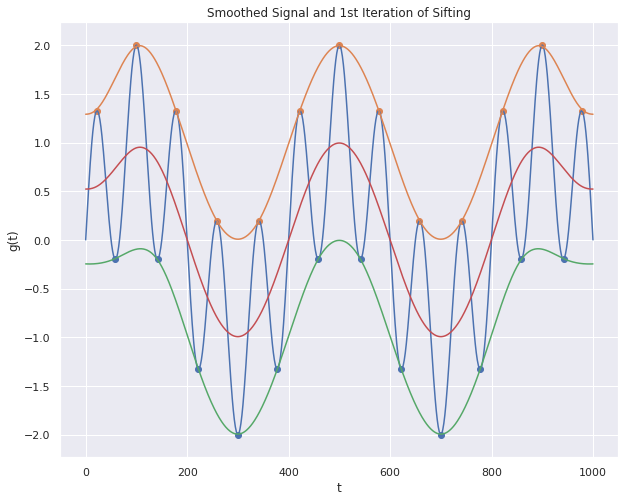

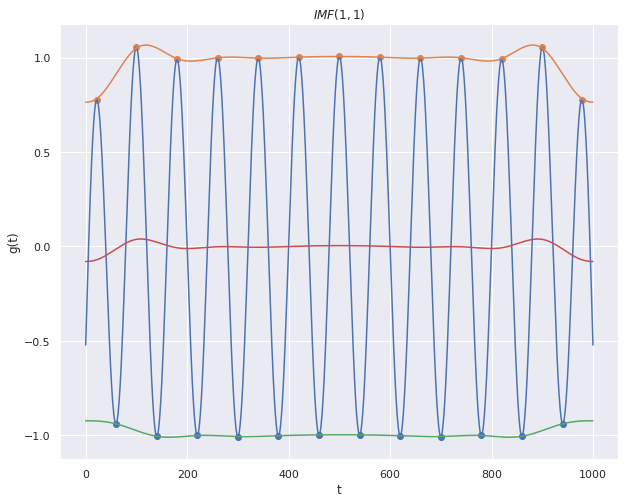

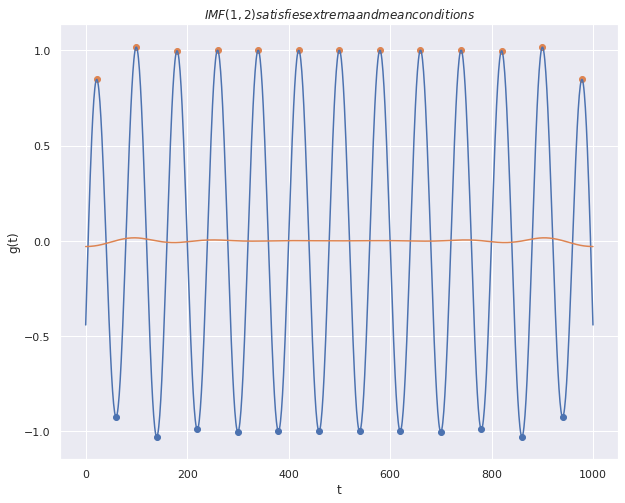

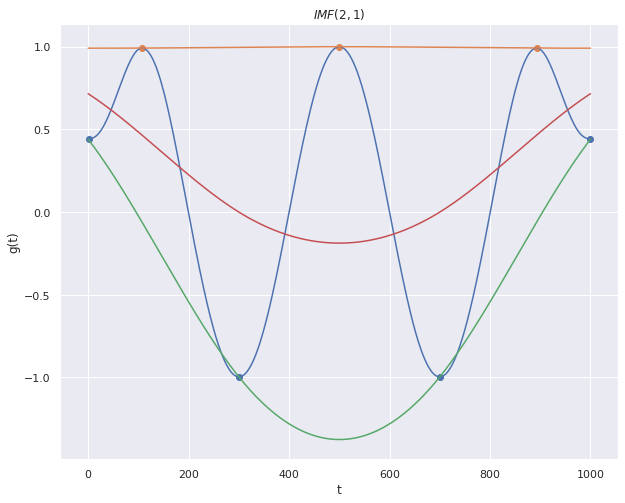

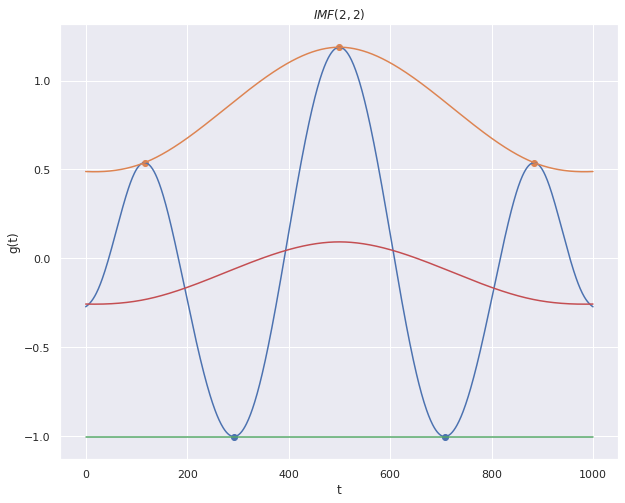

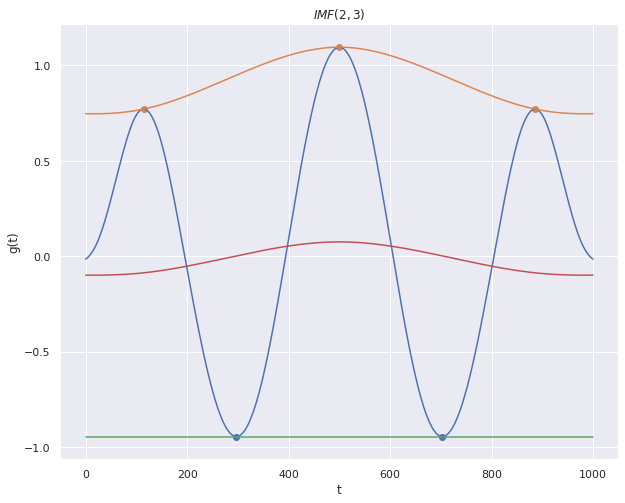

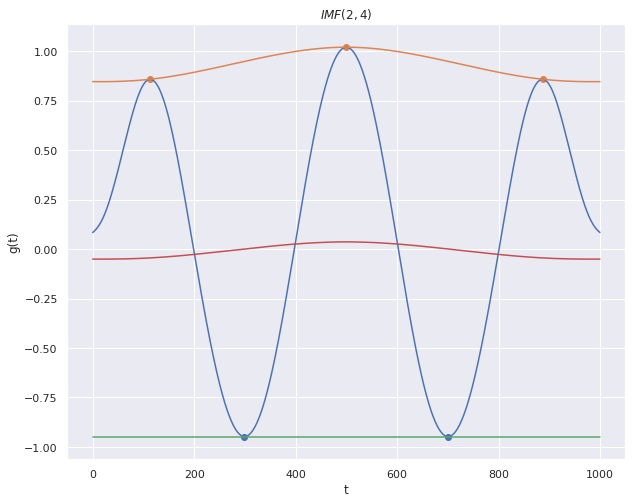

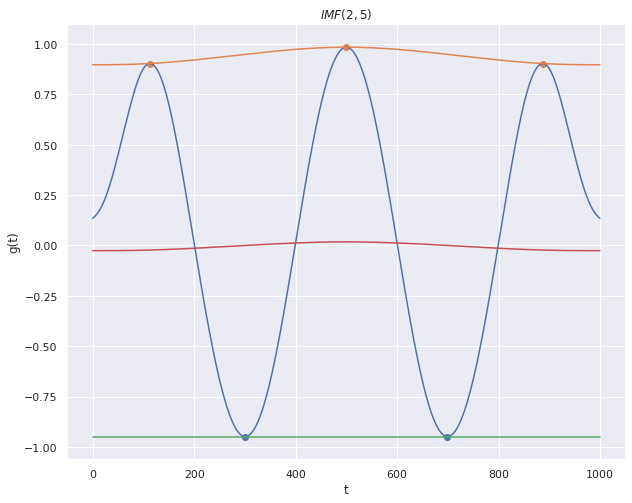

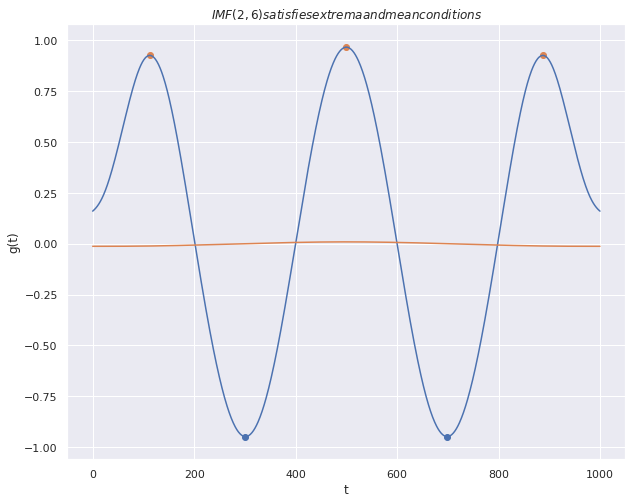

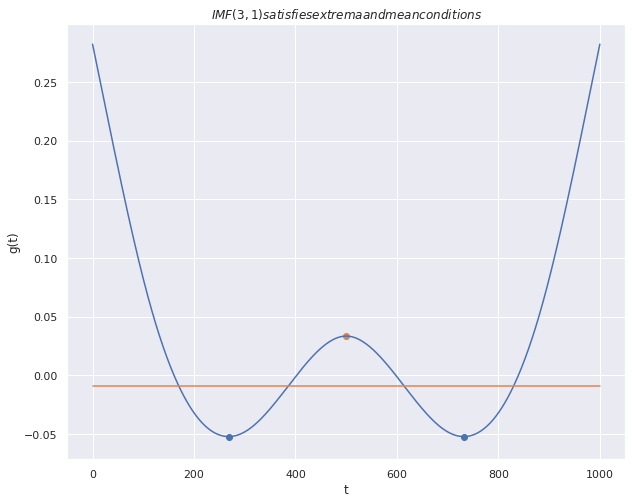

In [68]:
emd_imfs, emd_hts, emd_ifs, _, _, _, _ = emd.empirical_mode_decomposition(verbose=False, debug=True)

IMF_11 Standard deviation STOPPING CRITERION NOT MET with sd = 174.15
IMF_12 ALL IMF CONDITIONS MET
IMF_21 Standard deviation STOPPING CRITERION NOT MET with sd = 222902.44
IMF_22 Standard deviation STOPPING CRITERION NOT MET with sd = 19457.25
IMF_23 Standard deviation STOPPING CRITERION NOT MET with sd = 31738.65
IMF_24 Standard deviation STOPPING CRITERION NOT MET with sd = 848.38
IMF_25 Standard deviation STOPPING CRITERION NOT MET with sd = 111.55
IMF_26 ALL IMF CONDITIONS MET
IMF_31 ALL IMF CONDITIONS MET


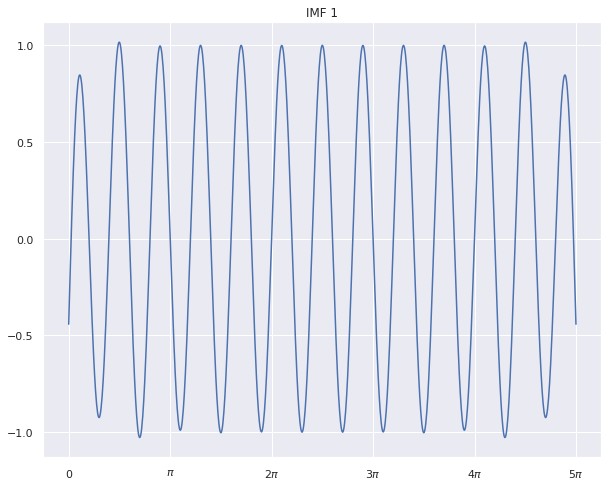

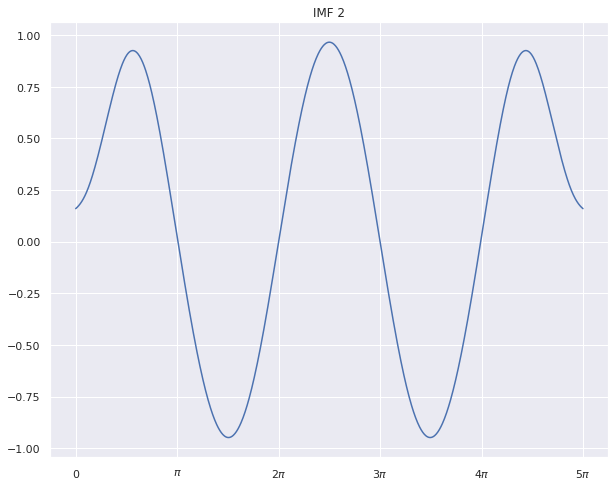

In [47]:
plt.title('IMF 1')
plt.plot(time, emd_imfs[1, :])
plt.xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi], ['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'])
plt.show()
plt.title('IMF 2')
plt.plot(time, emd_imfs[2, :])
plt.xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi, 5 * np.pi], ['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$', r'$5\pi$'])
plt.show()

### Plot Hilbert spectrum for demonstration purposes

In [42]:
hs_outputs = hilbert_spectrum(time, emd_imfs, emd_hts, emd_ifs, max_frequency=6, plot=False)

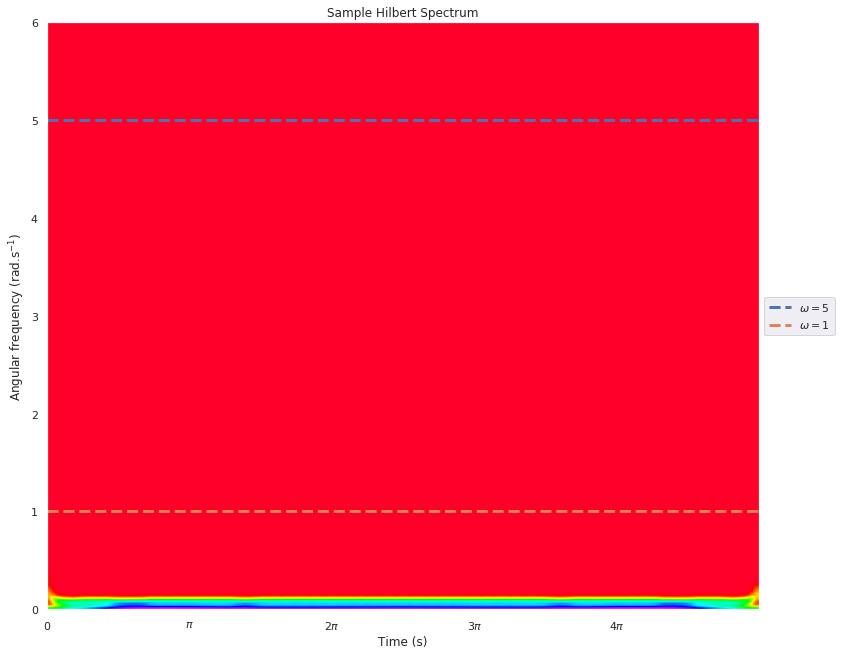

In [43]:
ax = plt.subplot(111)
plt.title('Sample Hilbert Spectrum')
x_hs, y, z = hs_outputs
z_min, z_max = 0, np.abs(z).max()
ax.pcolormesh(x_hs, y, np.abs(z), cmap='gist_rainbow', vmin=z_min, vmax=z_max)
ax.plot(x_hs[0, :], 5 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 5$', Linewidth=3)
ax.plot(x_hs[0, :], 1 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 1$', Linewidth=3)
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])
plt.ylabel(r'Angular frequency (rad.s$^{-1}$)')
plt.xlabel('Time (s)')
box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.85, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Why is this wrong?

This has happened because with no "time" key word argument, the instantaneous frequency was calculated in terms of the default time of:

self.time = np.arange(len(self.time_series))

This can be fixed in two ways:

(1) multiply instantaneous frequency by apropriate factor, or

(2) input optional time keyword argument.

### (1)

In [48]:
hs_outputs = hilbert_spectrum(time, emd_imfs, emd_hts, emd_ifs * (len(time_series) / time[-1]), max_frequency=6, plot=False)

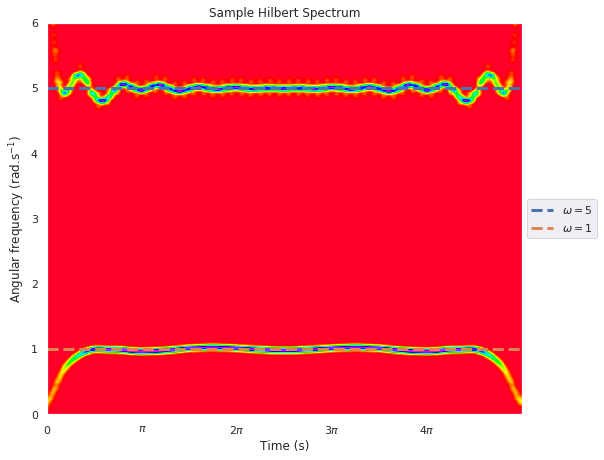

In [49]:
ax = plt.subplot(111)
plt.title('Sample Hilbert Spectrum')
x_hs, y, z = hs_outputs
z_min, z_max = 0, np.abs(z).max()
ax.pcolormesh(x_hs, y, np.abs(z), cmap='gist_rainbow', vmin=z_min, vmax=z_max)
ax.plot(x_hs[0, :], 5 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 5$', Linewidth=3)
ax.plot(x_hs[0, :], 1 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 1$', Linewidth=3)
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])
plt.ylabel(r'Angular frequency (rad.s$^{-1}$)')
plt.xlabel('Time (s)')
box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.85, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### (2)

In [50]:
emd = AdvEMDpy.EMD(time=time, time_series=time_series)
emd_imfs, emd_hts, emd_ifs, _, _, _, _ = emd.empirical_mode_decomposition(verbose=True)
hs_outputs = hilbert_spectrum(time, emd_imfs, emd_hts, emd_ifs, max_frequency=6, plot=False)

IMF_11 Standard deviation STOPPING CRITERION NOT MET with sd = 174.15
IMF_12 ALL IMF CONDITIONS MET
IMF_21 Standard deviation STOPPING CRITERION NOT MET with sd = 222902.44
IMF_22 Standard deviation STOPPING CRITERION NOT MET with sd = 19457.25
IMF_23 Standard deviation STOPPING CRITERION NOT MET with sd = 31738.65
IMF_24 Standard deviation STOPPING CRITERION NOT MET with sd = 848.38
IMF_25 Standard deviation STOPPING CRITERION NOT MET with sd = 111.55
IMF_26 ALL IMF CONDITIONS MET
IMF_31 ALL IMF CONDITIONS MET


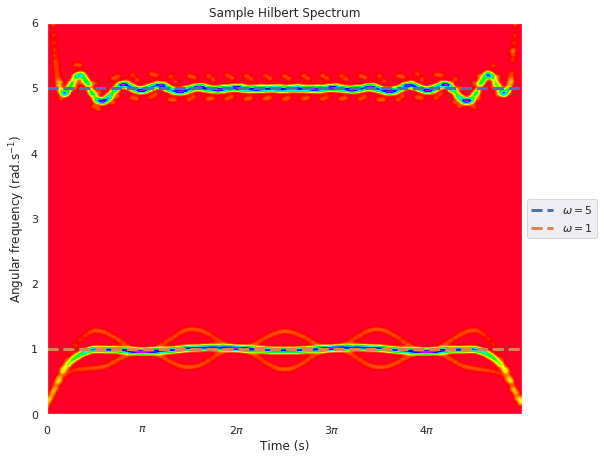

In [51]:
ax = plt.subplot(111)
plt.title('Sample Hilbert Spectrum')
x_hs, y, z = hs_outputs
z_min, z_max = 0, np.abs(z).max()
ax.pcolormesh(x_hs, y, np.abs(z), cmap='gist_rainbow', vmin=z_min, vmax=z_max)
ax.plot(x_hs[0, :], 5 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 5$', Linewidth=3)
ax.plot(x_hs[0, :], 1 * np.ones_like(x_hs[0, :]), '--', label=r'$\omega = 1$', Linewidth=3)
ax.set_xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi])
ax.set_xticklabels(['$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])
plt.ylabel(r'Angular frequency (rad.s$^{-1}$)')
plt.xlabel('Time (s)')
box_0 = ax.get_position()
ax.set_position([box_0.x0, box_0.y0 + 0.05, box_0.width * 0.85, box_0.height * 0.9])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### For consistency and good practice please use (2)